In [699]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge
import xgboost as xgb
from xgboost import plot_tree
from xgboost import XGBClassifier
from xgboost import plot_importance
from catboost import CatBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [10]:
# 한글 폰트 깨짐 방지
import warnings
import platform
from matplotlib import font_manager, rc
## 운영체제별 글꼴 세팅
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'AppleGothic'
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")
warnings.simplefilter(action='ignore')

In [395]:
df = pd.read_csv('C:\\Users\SAMSUNG\Desktop\SSAC\머신러닝\메인프로젝트/df/total_data(feature가공).csv')
df.head()

,jur_stn,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,...,before_q5,light_r,cctv_r,adult_r,bell_r,q1,q2,q3,q4,q5
0,서울중부경찰서,2017(상반기),22574.0,1324.0,0.0,1412.0,74.0,190.0,6.0,8.0,...,71.3,21000.0,0.000000,0.000000,0.000000,75.2,76.5,69.9,65.9,72.6
1,서울종로경찰서,2017(상반기),19674.0,1102.0,0.0,867.0,72.0,174.0,9.0,5.0,...,73.0,0.0,1.349325,1.369863,1.369863,81.6,82.4,69.1,62.7,72.2
2,서울남대문경찰서,2017(상반기),14499.0,949.0,0.0,736.0,63.0,182.0,10.0,5.0,...,69.5,1000.0,0.000000,0.000000,0.000000,77.3,79.3,68.8,61.0,71.7
3,서울서대문경찰서,2017(상반기),38769.0,1924.0,0.0,1788.0,127.0,329.0,20.0,9.0,...,66.5,0.0,0.000000,0.000000,0.000000,78.0,80.0,67.0,66.3,71.4
4,서울혜화경찰서,2017(상반기),18857.0,1127.0,0.0,899.0,68.0,180.0,11.0,9.0,...,69.5,0.0,0.482315,0.000000,0.000000,78.6,80.6,70.7,65.2,75.4


In [148]:
df.columns

Index(['jur_stn', 'year', 'report_sx_total', 'vio_cnt', 'mur_rob_cnt',
       'car_cnt', '차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남', '가해_여',
       '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대', '가해_70대',
       '가해_80대이상', '가해_미분류', '피해_남', '피해_미분류', '피해_여', '피해_10대이하', '피해_20대',
       '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상', 'popu_합계',
       'for_합계', 'popu_u20', 'popu_o60', 'for_u20', 'for_2030', 'single_합계',
       'single_u20', 'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_u20', 'single_f_2030', 'single_f_4050', 'single_f_o60',
       'popu_2050', 'for_o40', '총범죄발생대비검거수', '절도폭력범죄발생대비검거수', '강도살인범죄발생대비검거수',
       '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수', '인구수대비검거수', '외국인인구수대비검거수', '인구수대비경찰수',
       'before_q1', 'before_q2', 'before_q3', 'before_q4', 'before_q5',
       'light_r', 'cctv_r', 'adult_r', 'bell_r', 'q1', 'q2', 'q3', 'q4', 'q5'],
      dtype='object')

### 교통사고 feature engineering

In [396]:
traffic = df[['jur_stn', 'year','차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남', '가해_여',
       '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대', '가해_70대',
       '가해_80대이상', '가해_미분류', '피해_남', '피해_미분류', '피해_여', '피해_10대이하', '피해_20대',
       '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상']]
traffic.head()


,jur_stn,year,차대사람,차대차,차량단독,가해_성별_기타불명,가해_남,가해_여,가해_10대이하,가해_20대,...,피해_미분류,피해_여,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상
0,서울중부경찰서,2017(상반기),74.0,190.0,6.0,8.0,220.0,42.0,4.0,40.0,...,6.0,65.0,8.0,34.0,54.0,38.0,58.0,46.0,20.0,5.0
1,서울종로경찰서,2017(상반기),72.0,174.0,9.0,5.0,211.0,39.0,3.0,24.0,...,10.0,67.0,3.0,32.0,53.0,47.0,55.0,35.0,16.0,6.0
2,서울남대문경찰서,2017(상반기),63.0,182.0,10.0,5.0,213.0,37.0,1.0,25.0,...,11.0,52.0,3.0,27.0,49.0,48.0,55.0,45.0,13.0,3.0
3,서울서대문경찰서,2017(상반기),127.0,329.0,20.0,9.0,390.0,78.0,18.0,60.0,...,21.0,116.0,17.0,76.0,73.0,83.0,95.0,73.0,28.0,10.0
4,서울혜화경찰서,2017(상반기),68.0,180.0,11.0,9.0,216.0,33.0,2.0,36.0,...,12.0,56.0,3.0,35.0,45.0,39.0,56.0,43.0,21.0,5.0


In [412]:
df.피해_남

0      198.0
1      178.0
2      192.0
3      339.0
4      190.0
       ...  
323    217.0
324    190.0
325    103.0
326    182.0
327    258.0
Name: 피해_남, Length: 328, dtype: float64

### feature들 간의 상관관계 확인하기

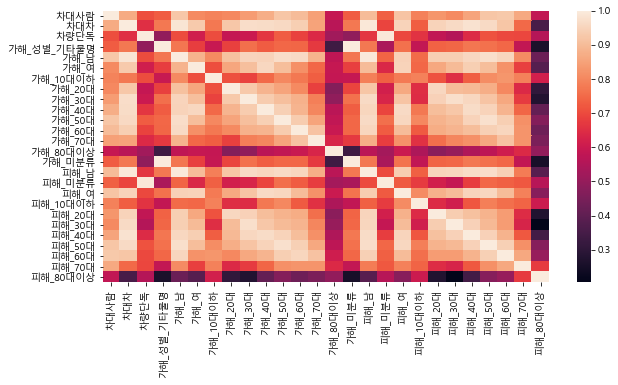

In [127]:
plt.figure(figsize = (10,5))
sns.heatmap(traffic.corr())
plt.show()

In [358]:
trf_corr = traffic.corr()
trf_corr[(trf_corr > 0.9) &(trf_corr != 1)]

,차대사람,차대차,차량단독,가해_성별_기타불명,가해_남,가해_여,가해_10대이하,가해_20대,가해_30대,가해_40대,...,피해_미분류,피해_여,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상
차대사람,NaN,NaN,NaN,NaN,0.924879,NaN,NaN,NaN,NaN,NaN,...,NaN,0.917221,NaN,NaN,NaN,NaN,0.920480,0.927734,NaN,NaN
차대차,NaN,NaN,NaN,NaN,0.984878,0.930674,NaN,0.922936,0.969965,0.966004,...,NaN,0.949810,NaN,0.948128,0.964984,0.979243,0.965715,0.921009,NaN,NaN
차량단독,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.990904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가해_성별_기타불명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가해_남,0.924879,0.984878,NaN,NaN,NaN,NaN,NaN,0.910401,0.952174,0.948319,...,NaN,0.946159,NaN,0.939600,0.939310,0.959065,0.974998,0.954270,NaN,NaN
가해_여,NaN,0.930674,NaN,NaN,NaN,NaN,NaN,NaN,0.908633,0.956960,...,NaN,0.948730,NaN,NaN,NaN,0.938783,0.904266,NaN,NaN,NaN
가해_10대이하,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가해_20대,NaN,0.922936,NaN,NaN,0.910401,NaN,NaN,NaN,0.927924,NaN,...,NaN,NaN,NaN,0.958965,0.900987,NaN,NaN,NaN,NaN,NaN
가해_30대,NaN,0.969965,NaN,NaN,0.952174,0.908633,NaN,0.927924,NaN,0.933607,...,NaN,0.917667,NaN,0.945934,0.972717,0.959435,0.919074,NaN,NaN,NaN
가해_40대,NaN,0.966004,NaN,NaN,0.948319,0.956960,NaN,NaN,0.933607,NaN,...,NaN,0.964406,NaN,0.905101,0.923442,0.967327,0.949910,NaN,NaN,NaN


##### 3040, 506070대가 굉장히 높은 corr을 나타냄

In [151]:
traffic.columns

Index(['jur_stn', 'year', '차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남', '가해_여',
       '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대', '가해_70대',
       '가해_80대이상', '가해_미분류', '피해_남', '피해_미분류', '피해_여', '피해_10대이하', '피해_20대',
       '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상'],
      dtype='object')

In [152]:
traffic.corr()

,차대사람,차대차,차량단독,가해_성별_기타불명,가해_남,가해_여,가해_10대이하,가해_20대,가해_30대,가해_40대,...,피해_미분류,피해_여,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상
차대사람,1.000000,0.866529,0.705108,0.727121,0.924879,0.805193,0.792264,0.802740,0.841054,0.873139,...,0.734262,0.917221,0.789794,0.828939,0.806254,0.856548,0.920480,0.927734,0.864275,0.582679
차대차,0.866529,1.000000,0.654752,0.773277,0.984878,0.930674,0.773273,0.922936,0.969965,0.966004,...,0.690869,0.949810,0.732266,0.948128,0.964984,0.979243,0.965715,0.921009,0.751101,0.356150
차량단독,0.705108,0.654752,1.000000,0.496637,0.703594,0.614306,0.703017,0.587861,0.600262,0.665343,...,0.990904,0.696380,0.659956,0.580786,0.556176,0.644175,0.712734,0.696352,0.694614,0.561417
가해_성별_기타불명,0.727121,0.773277,0.496637,1.000000,0.770256,0.679817,0.596014,0.685814,0.759553,0.729258,...,0.541964,0.763337,0.585964,0.736515,0.743654,0.771419,0.763549,0.745878,0.586219,0.261941
가해_남,0.924879,0.984878,0.703594,0.770256,1.000000,0.883514,0.806184,0.910401,0.952174,0.948319,...,0.739454,0.946159,0.753288,0.939600,0.939310,0.959065,0.974998,0.954270,0.810403,0.425286
가해_여,0.805193,0.930674,0.614306,0.679817,0.883514,1.000000,0.706333,0.858669,0.908633,0.956960,...,0.636894,0.948730,0.745538,0.861153,0.898438,0.938783,0.904266,0.820430,0.680839,0.384233
가해_10대이하,0.792264,0.773273,0.703017,0.596014,0.806184,0.706333,1.000000,0.709148,0.686794,0.751268,...,0.733783,0.777521,0.789645,0.711284,0.651779,0.731830,0.812868,0.828596,0.791066,0.616901
가해_20대,0.802740,0.922936,0.587861,0.685814,0.910401,0.858669,0.709148,1.000000,0.927924,0.887345,...,0.617690,0.865906,0.649933,0.958965,0.900987,0.895338,0.874009,0.803139,0.641458,0.308908
가해_30대,0.841054,0.969965,0.600262,0.759553,0.952174,0.908633,0.686794,0.927924,1.000000,0.933607,...,0.633275,0.917667,0.648454,0.945934,0.972717,0.959435,0.919074,0.862578,0.674864,0.279034
가해_40대,0.873139,0.966004,0.665343,0.729258,0.948319,0.956960,0.751268,0.887345,0.933607,1.000000,...,0.691348,0.964406,0.773881,0.905101,0.923442,0.967327,0.949910,0.886486,0.743316,0.411536


### 인구 feature 묶기

##### 인구 나이 묶기

In [397]:
df_age = df[['jur_stn', 'year','가해_10대이하',
       '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대', '가해_70대', '가해_80대이상','피해_10대이하', '피해_20대', '피해_30대',
       '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상']]
df_age.head()

,jur_stn,year,가해_10대이하,가해_20대,가해_30대,가해_40대,가해_50대,가해_60대,가해_70대,가해_80대이상,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상
0,서울중부경찰서,2017(상반기),4.0,40.0,36.0,42.0,69.0,48.0,22.0,2.0,8.0,34.0,54.0,38.0,58.0,46.0,20.0,5.0
1,서울종로경찰서,2017(상반기),3.0,24.0,42.0,40.0,55.0,62.0,23.0,1.0,3.0,32.0,53.0,47.0,55.0,35.0,16.0,6.0
2,서울남대문경찰서,2017(상반기),1.0,25.0,38.0,40.0,65.0,57.0,22.0,2.0,3.0,27.0,49.0,48.0,55.0,45.0,13.0,3.0
3,서울서대문경찰서,2017(상반기),18.0,60.0,62.0,72.0,124.0,94.0,34.0,4.0,17.0,76.0,73.0,83.0,95.0,73.0,28.0,10.0
4,서울혜화경찰서,2017(상반기),2.0,36.0,35.0,44.0,66.0,51.0,15.0,2.0,3.0,35.0,45.0,39.0,56.0,43.0,21.0,5.0


In [398]:
df_age['가해_5670'] = df_age[['가해_50대','가해_60대','가해_70대']].apply(lambda x : round(x.sum()), axis = 1)
df_age['가해_5670'].head()

0    139
1    140
2    144
3    252
4    132
Name: 가해_5670, dtype: int64

In [399]:
df_age['피해_5670'] = df_age[['피해_50대','피해_60대','피해_70대']].apply(lambda x : round(x.sum()), axis = 1)
df_age

,jur_stn,year,가해_10대이하,가해_20대,가해_30대,가해_40대,가해_50대,가해_60대,가해_70대,가해_80대이상,피해_10대이하,피해_20대,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상,가해_5670,피해_5670
0,서울중부경찰서,2017(상반기),4.0,40.0,36.0,42.0,69.0,48.0,22.0,2.0,8.0,34.0,54.0,38.0,58.0,46.0,20.0,5.0,139,124
1,서울종로경찰서,2017(상반기),3.0,24.0,42.0,40.0,55.0,62.0,23.0,1.0,3.0,32.0,53.0,47.0,55.0,35.0,16.0,6.0,140,106
2,서울남대문경찰서,2017(상반기),1.0,25.0,38.0,40.0,65.0,57.0,22.0,2.0,3.0,27.0,49.0,48.0,55.0,45.0,13.0,3.0,144,113
3,서울서대문경찰서,2017(상반기),18.0,60.0,62.0,72.0,124.0,94.0,34.0,4.0,17.0,76.0,73.0,83.0,95.0,73.0,28.0,10.0,252,196
4,서울혜화경찰서,2017(상반기),2.0,36.0,35.0,44.0,66.0,51.0,15.0,2.0,3.0,35.0,45.0,39.0,56.0,43.0,21.0,5.0,132,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,창원서부경찰서,2020(하반기),3.0,29.0,52.0,49.0,82.0,72.0,18.0,2.0,7.0,30.0,61.0,62.0,67.0,49.0,16.0,11.0,172,132
324,마산중부경찰서,2020(하반기),2.0,31.0,24.0,52.0,71.0,61.0,26.0,7.0,9.0,34.0,34.0,42.0,52.0,52.0,17.0,8.0,158,121
325,마산동부경찰서,2020(하반기),2.0,15.0,19.0,32.0,58.0,38.0,11.0,1.0,7.0,18.0,30.0,31.0,39.0,27.0,18.0,2.0,107,84
326,진주경찰서,2020(하반기),8.0,51.0,58.0,46.0,80.0,54.0,19.0,5.0,25.0,37.0,41.0,39.0,69.0,60.0,33.0,10.0,153,162


In [400]:
df_age['피해_340'] = df_age[['피해_30대','피해_40대']].apply(lambda x : round(x.sum()), axis = 1)
df_age['가해_340'] = df_age[['가해_30대','가해_40대']].apply(lambda x : round(x.sum()), axis = 1)
df_age

,jur_stn,year,가해_10대이하,가해_20대,가해_30대,가해_40대,가해_50대,가해_60대,가해_70대,가해_80대이상,...,피해_30대,피해_40대,피해_50대,피해_60대,피해_70대,피해_80대이상,가해_5670,피해_5670,피해_340,가해_340
0,서울중부경찰서,2017(상반기),4.0,40.0,36.0,42.0,69.0,48.0,22.0,2.0,...,54.0,38.0,58.0,46.0,20.0,5.0,139,124,92,78
1,서울종로경찰서,2017(상반기),3.0,24.0,42.0,40.0,55.0,62.0,23.0,1.0,...,53.0,47.0,55.0,35.0,16.0,6.0,140,106,100,82
2,서울남대문경찰서,2017(상반기),1.0,25.0,38.0,40.0,65.0,57.0,22.0,2.0,...,49.0,48.0,55.0,45.0,13.0,3.0,144,113,97,78
3,서울서대문경찰서,2017(상반기),18.0,60.0,62.0,72.0,124.0,94.0,34.0,4.0,...,73.0,83.0,95.0,73.0,28.0,10.0,252,196,156,134
4,서울혜화경찰서,2017(상반기),2.0,36.0,35.0,44.0,66.0,51.0,15.0,2.0,...,45.0,39.0,56.0,43.0,21.0,5.0,132,120,84,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,창원서부경찰서,2020(하반기),3.0,29.0,52.0,49.0,82.0,72.0,18.0,2.0,...,61.0,62.0,67.0,49.0,16.0,11.0,172,132,123,101
324,마산중부경찰서,2020(하반기),2.0,31.0,24.0,52.0,71.0,61.0,26.0,7.0,...,34.0,42.0,52.0,52.0,17.0,8.0,158,121,76,76
325,마산동부경찰서,2020(하반기),2.0,15.0,19.0,32.0,58.0,38.0,11.0,1.0,...,30.0,31.0,39.0,27.0,18.0,2.0,107,84,61,51
326,진주경찰서,2020(하반기),8.0,51.0,58.0,46.0,80.0,54.0,19.0,5.0,...,41.0,39.0,69.0,60.0,33.0,10.0,153,162,80,104


In [401]:
df_age.columns

Index(['jur_stn', 'year', '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대',
       '가해_60대', '가해_70대', '가해_80대이상', '피해_10대이하', '피해_20대', '피해_30대',
       '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상', '가해_5670',
       '피해_5670', '피해_340', '가해_340'],
      dtype='object')

In [402]:
df_age = df_age.drop(['가해_30대','가해_40대','가해_50대','가해_60대','가해_70대','피해_30대','피해_40대','피해_50대','피해_60대','피해_70대'], axis = 1)
df_age.head()

,jur_stn,year,가해_10대이하,가해_20대,가해_80대이상,피해_10대이하,피해_20대,피해_80대이상,가해_5670,피해_5670,피해_340,가해_340
0,서울중부경찰서,2017(상반기),4.0,40.0,2.0,8.0,34.0,5.0,139,124,92,78
1,서울종로경찰서,2017(상반기),3.0,24.0,1.0,3.0,32.0,6.0,140,106,100,82
2,서울남대문경찰서,2017(상반기),1.0,25.0,2.0,3.0,27.0,3.0,144,113,97,78
3,서울서대문경찰서,2017(상반기),18.0,60.0,4.0,17.0,76.0,10.0,252,196,156,134
4,서울혜화경찰서,2017(상반기),2.0,36.0,2.0,3.0,35.0,5.0,132,120,84,79


##### 2030도 높게 나오긴 하다. 일단 보류

In [159]:
corr = lambda p : p['가해_20대'].corr(p['가해_30대'])
re = corr(df_age)
print(re)

0.9279240999070664


In [160]:
corr = lambda p : p['피해_20대'].corr(p['피해_30대'])
re = corr(df_age)
print(re)

0.9359168463827027


In [403]:
df.columns

Index(['jur_stn', 'year', 'report_sx_total', 'vio_cnt', 'mur_rob_cnt',
       'car_cnt', '차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남', '가해_여',
       '가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대', '가해_70대',
       '가해_80대이상', '가해_미분류', '피해_남', '피해_미분류', '피해_여', '피해_10대이하', '피해_20대',
       '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상', 'popu_합계',
       'for_합계', 'popu_u20', 'popu_o60', 'for_u20', 'for_2030', 'single_합계',
       'single_u20', 'single_2030', 'single_4050', 'single_o60', 'single_f_합계',
       'single_f_u20', 'single_f_2030', 'single_f_4050', 'single_f_o60',
       'popu_2050', 'for_o40', '총범죄발생대비검거수', '절도폭력범죄발생대비검거수', '강도살인범죄발생대비검거수',
       '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수', '인구수대비검거수', '외국인인구수대비검거수', '인구수대비경찰수',
       'before_q1', 'before_q2', 'before_q3', 'before_q4', 'before_q5',
       'light_r', 'cctv_r', 'adult_r', 'bell_r', 'q1', 'q2', 'q3', 'q4', 'q5'],
      dtype='object')

In [404]:
df_merge = pd.merge(df_mer, df_age, how = 'left', on = ['jur_stn','year'])
df_merge

,jur_stn,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,...,가해_10대이하,가해_20대,가해_80대이상,피해_10대이하,피해_20대,피해_80대이상,가해_5670,피해_5670,피해_340,가해_340
0,서울중부경찰서,2017(상반기),22574.0,1324.0,0.0,1412.0,74.0,190.0,6.0,8.0,...,4.0,40.0,2.0,8.0,34.0,5.0,139,124,92,78
1,서울종로경찰서,2017(상반기),19674.0,1102.0,0.0,867.0,72.0,174.0,9.0,5.0,...,3.0,24.0,1.0,3.0,32.0,6.0,140,106,100,82
2,서울남대문경찰서,2017(상반기),14499.0,949.0,0.0,736.0,63.0,182.0,10.0,5.0,...,1.0,25.0,2.0,3.0,27.0,3.0,144,113,97,78
3,서울서대문경찰서,2017(상반기),38769.0,1924.0,0.0,1788.0,127.0,329.0,20.0,9.0,...,18.0,60.0,4.0,17.0,76.0,10.0,252,196,156,134
4,서울혜화경찰서,2017(상반기),18857.0,1127.0,0.0,899.0,68.0,180.0,11.0,9.0,...,2.0,36.0,2.0,3.0,35.0,5.0,132,120,84,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,창원서부경찰서,2020(하반기),21563.0,1282.0,1.0,1984.0,67.0,236.0,8.0,4.0,...,3.0,29.0,2.0,7.0,30.0,11.0,172,132,123,101
324,마산중부경찰서,2020(하반기),17412.0,1107.0,1.0,1301.0,64.0,185.0,26.0,1.0,...,2.0,31.0,7.0,9.0,34.0,8.0,158,121,76,76
325,마산동부경찰서,2020(하반기),24025.0,1430.0,4.0,1919.0,54.0,118.0,4.0,0.0,...,2.0,15.0,1.0,7.0,18.0,2.0,107,84,61,51
326,진주경찰서,2020(하반기),34627.0,2347.0,2.0,3169.0,115.0,199.0,13.0,6.0,...,8.0,51.0,5.0,25.0,37.0,10.0,153,162,80,104


In [405]:
df_mer = df.drop(['가해_10대이하', '가해_20대', '가해_30대', '가해_40대', '가해_50대', '가해_60대', '가해_70대',
       '가해_80대이상', '가해_미분류', '피해_10대이하', '피해_20대',
       '피해_30대', '피해_40대', '피해_50대', '피해_60대', '피해_70대', '피해_80대이상'], axis = 1)

```
교통사고가 잘 안 나는 곳
내가 교통사고 안 당할 거라고 체감할 수 있는 요소가 무엇이 있을까
신호등 유무, 무단횡단, 교통위반(과속, 신호어김, etc.), 
```

In [406]:
df_merge.to_csv('C:\\Users\SAMSUNG\Desktop\SSAC\머신러닝\메인프로젝트\df/교통머지.csv', index = False)

### merge하기

In [407]:
trf_merge = pd.read_csv('C:\\Users\SAMSUNG\Desktop\SSAC\머신러닝\메인프로젝트\df/교통머지.csv')
trf_merge.head()

,jur_stn,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,...,가해_10대이하,가해_20대,가해_80대이상,피해_10대이하,피해_20대,피해_80대이상,가해_5670,피해_5670,피해_340,가해_340
0,서울중부경찰서,2017(상반기),22574.0,1324.0,0.0,1412.0,74.0,190.0,6.0,8.0,...,4.0,40.0,2.0,8.0,34.0,5.0,139,124,92,78
1,서울종로경찰서,2017(상반기),19674.0,1102.0,0.0,867.0,72.0,174.0,9.0,5.0,...,3.0,24.0,1.0,3.0,32.0,6.0,140,106,100,82
2,서울남대문경찰서,2017(상반기),14499.0,949.0,0.0,736.0,63.0,182.0,10.0,5.0,...,1.0,25.0,2.0,3.0,27.0,3.0,144,113,97,78
3,서울서대문경찰서,2017(상반기),38769.0,1924.0,0.0,1788.0,127.0,329.0,20.0,9.0,...,18.0,60.0,4.0,17.0,76.0,10.0,252,196,156,134
4,서울혜화경찰서,2017(상반기),18857.0,1127.0,0.0,899.0,68.0,180.0,11.0,9.0,...,2.0,36.0,2.0,3.0,35.0,5.0,132,120,84,79


In [408]:
trf_merge['year'].unique()

array(['2017(상반기)', '2017(하반기)', '2018(상반기)', '2018(하반기)', '2019(상반기)',
       '2019(하반기)', '2020(상반기)', '2020(하반기)'], dtype=object)

### 성별이랑 나이를 합칠 수는 없을까?

In [409]:
trf_merge.corr()

,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,가해_남,가해_여,...,가해_10대이하,가해_20대,가해_80대이상,피해_10대이하,피해_20대,피해_80대이상,가해_5670,피해_5670,피해_340,가해_340
report_sx_total,1.000000,0.950691,0.296773,0.861090,0.874208,0.850751,0.620132,0.686755,0.889416,0.742258,...,0.760372,0.850010,0.538026,0.709975,0.875124,0.445359,0.865981,0.869693,0.808654,0.824276
vio_cnt,0.950691,1.000000,0.345592,0.790746,0.843633,0.769777,0.624981,0.612411,0.823339,0.666387,...,0.738939,0.798147,0.491733,0.723806,0.792157,0.506458,0.795993,0.819923,0.716454,0.750439
mur_rob_cnt,0.296773,0.345592,1.000000,0.227590,0.243367,0.195453,0.201065,0.173746,0.225971,0.138420,...,0.173675,0.205536,0.087735,0.239453,0.191821,0.171926,0.227584,0.242387,0.161784,0.179319
car_cnt,0.861090,0.790746,0.227590,1.000000,0.759094,0.858665,0.506312,0.661204,0.835808,0.845483,...,0.605102,0.884058,0.453293,0.644276,0.884354,0.273383,0.788343,0.777534,0.858950,0.870281
차대사람,0.874208,0.843633,0.243367,0.759094,1.000000,0.866529,0.705108,0.727121,0.924879,0.805193,...,0.792264,0.802740,0.590716,0.789794,0.828939,0.582679,0.928352,0.943790,0.841247,0.871460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
피해_80대이상,0.445359,0.506458,0.171926,0.273383,0.582679,0.356150,0.561417,0.261941,0.425286,0.384233,...,0.616901,0.308908,0.495256,0.604397,0.276068,1.000000,0.465234,0.527836,0.274077,0.350233
가해_5670,0.865981,0.795993,0.227584,0.788343,0.928352,0.963063,0.719576,0.755759,0.983000,0.873665,...,0.802965,0.835140,0.611523,0.773703,0.884199,0.465234,1.000000,0.983041,0.933439,0.931244
피해_5670,0.869693,0.819923,0.242387,0.777534,0.943790,0.948489,0.725847,0.755664,0.974207,0.868887,...,0.840893,0.841419,0.617171,0.794595,0.862037,0.527836,0.983041,1.000000,0.902999,0.924177
피해_340,0.808654,0.716454,0.161784,0.858950,0.841247,0.985208,0.605448,0.767149,0.961766,0.930030,...,0.698641,0.910929,0.532251,0.670983,0.937654,0.274077,0.933439,0.902999,1.000000,0.985204


In [410]:
# 10대와 80대는 성별과 상관성이 떨어짐
trf_merge[['가해_남','가해_80대이상']].corr()

,가해_남,가해_80대이상
가해_남,1.000000,0.577906
가해_80대이상,0.577906,1.000000


In [411]:
trf_merge

,jur_stn,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,...,가해_10대이하,가해_20대,가해_80대이상,피해_10대이하,피해_20대,피해_80대이상,가해_5670,피해_5670,피해_340,가해_340
0,서울중부경찰서,2017(상반기),22574.0,1324.0,0.0,1412.0,74.0,190.0,6.0,8.0,...,4.0,40.0,2.0,8.0,34.0,5.0,139,124,92,78
1,서울종로경찰서,2017(상반기),19674.0,1102.0,0.0,867.0,72.0,174.0,9.0,5.0,...,3.0,24.0,1.0,3.0,32.0,6.0,140,106,100,82
2,서울남대문경찰서,2017(상반기),14499.0,949.0,0.0,736.0,63.0,182.0,10.0,5.0,...,1.0,25.0,2.0,3.0,27.0,3.0,144,113,97,78
3,서울서대문경찰서,2017(상반기),38769.0,1924.0,0.0,1788.0,127.0,329.0,20.0,9.0,...,18.0,60.0,4.0,17.0,76.0,10.0,252,196,156,134
4,서울혜화경찰서,2017(상반기),18857.0,1127.0,0.0,899.0,68.0,180.0,11.0,9.0,...,2.0,36.0,2.0,3.0,35.0,5.0,132,120,84,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,창원서부경찰서,2020(하반기),21563.0,1282.0,1.0,1984.0,67.0,236.0,8.0,4.0,...,3.0,29.0,2.0,7.0,30.0,11.0,172,132,123,101
324,마산중부경찰서,2020(하반기),17412.0,1107.0,1.0,1301.0,64.0,185.0,26.0,1.0,...,2.0,31.0,7.0,9.0,34.0,8.0,158,121,76,76
325,마산동부경찰서,2020(하반기),24025.0,1430.0,4.0,1919.0,54.0,118.0,4.0,0.0,...,2.0,15.0,1.0,7.0,18.0,2.0,107,84,61,51
326,진주경찰서,2020(하반기),34627.0,2347.0,2.0,3169.0,115.0,199.0,13.0,6.0,...,8.0,51.0,5.0,25.0,37.0,10.0,153,162,80,104


### columns 합치기 위해 건별, 성별, 인구 비율 계산하기

In [413]:
trf_merge.columns

Index(['jur_stn', 'year', 'report_sx_total', 'vio_cnt', 'mur_rob_cnt',
       'car_cnt', '차대사람', '차대차', '차량단독', '가해_성별_기타불명', '가해_남', '가해_여', '피해_남',
       '피해_미분류', '피해_여', 'popu_합계', 'for_합계', 'popu_u20', 'popu_o60',
       'for_u20', 'for_2030', 'single_합계', 'single_u20', 'single_2030',
       'single_4050', 'single_o60', 'single_f_합계', 'single_f_u20',
       'single_f_2030', 'single_f_4050', 'single_f_o60', 'popu_2050',
       'for_o40', '총범죄발생대비검거수', '절도폭력범죄발생대비검거수', '강도살인범죄발생대비검거수',
       '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수', '인구수대비검거수', '외국인인구수대비검거수', '인구수대비경찰수',
       'before_q1', 'before_q2', 'before_q3', 'before_q4', 'before_q5',
       'light_r', 'cctv_r', 'adult_r', 'bell_r', 'q1', 'q2', 'q3', 'q4', 'q5',
       '가해_10대이하', '가해_20대', '가해_80대이상', '피해_10대이하', '피해_20대', '피해_80대이상',
       '가해_5670', '피해_5670', '피해_340', '가해_340'],
      dtype='object')

In [442]:
ofn_sum = trf_merge[['가해_10대이하', '가해_20대', '가해_80대이상','가해_5670','가해_340']].sum(axis = 1)
vic_sum = trf_merge[['피해_10대이하', '피해_20대', '피해_80대이상','피해_5670', '피해_340']].sum(axis = 1)
ofnsex_sum = trf_merge[['가해_남','가해_여','가해_성별_기타불명']].sum(axis = 1)
vicsex_sum = trf_merge[['피해_남','피해_여','피해_미분류']].sum(axis = 1)
case_sum = trf_merge[['차대사람','차대차','차량단독']].sum(axis = 1)

trf_sum = pd.concat([trf_merge,ofn_sum,vic_sum,ofnsex_sum,vicsex_sum,case_sum], axis = 1)
trf_sum.head()

,jur_stn,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,...,피해_80대이상,가해_5670,피해_5670,피해_340,가해_340,0,1,2,3,4
0,서울중부경찰서,2017(상반기),22574.0,1324.0,0.0,1412.0,74.0,190.0,6.0,8.0,...,5.0,139,124,92,78,263.0,263.0,270.0,269.0,270.0
1,서울종로경찰서,2017(상반기),19674.0,1102.0,0.0,867.0,72.0,174.0,9.0,5.0,...,6.0,140,106,100,82,250.0,247.0,255.0,255.0,255.0
2,서울남대문경찰서,2017(상반기),14499.0,949.0,0.0,736.0,63.0,182.0,10.0,5.0,...,3.0,144,113,97,78,250.0,243.0,255.0,255.0,255.0
3,서울서대문경찰서,2017(상반기),38769.0,1924.0,0.0,1788.0,127.0,329.0,20.0,9.0,...,10.0,252,196,156,134,468.0,455.0,477.0,476.0,476.0
4,서울혜화경찰서,2017(상반기),18857.0,1127.0,0.0,899.0,68.0,180.0,11.0,9.0,...,5.0,132,120,84,79,251.0,247.0,258.0,258.0,259.0


In [444]:
trf_sum

,jur_stn,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,...,피해_80대이상,가해_5670,피해_5670,피해_340,가해_340,ofn_sum,vic_sum,ofnsex_sum,vicsex_sum,case_sum
0,서울중부경찰서,2017(상반기),22574.0,1324.0,0.0,1412.0,74.0,190.0,6.0,8.0,...,5.0,139,124,92,78,263.0,263.0,270.0,269.0,270.0
1,서울종로경찰서,2017(상반기),19674.0,1102.0,0.0,867.0,72.0,174.0,9.0,5.0,...,6.0,140,106,100,82,250.0,247.0,255.0,255.0,255.0
2,서울남대문경찰서,2017(상반기),14499.0,949.0,0.0,736.0,63.0,182.0,10.0,5.0,...,3.0,144,113,97,78,250.0,243.0,255.0,255.0,255.0
3,서울서대문경찰서,2017(상반기),38769.0,1924.0,0.0,1788.0,127.0,329.0,20.0,9.0,...,10.0,252,196,156,134,468.0,455.0,477.0,476.0,476.0
4,서울혜화경찰서,2017(상반기),18857.0,1127.0,0.0,899.0,68.0,180.0,11.0,9.0,...,5.0,132,120,84,79,251.0,247.0,258.0,258.0,259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,창원서부경찰서,2020(하반기),21563.0,1282.0,1.0,1984.0,67.0,236.0,8.0,4.0,...,11.0,172,132,123,101,307.0,303.0,311.0,311.0,311.0
324,마산중부경찰서,2020(하반기),17412.0,1107.0,1.0,1301.0,64.0,185.0,26.0,1.0,...,8.0,158,121,76,76,274.0,248.0,275.0,275.0,275.0
325,마산동부경찰서,2020(하반기),24025.0,1430.0,4.0,1919.0,54.0,118.0,4.0,0.0,...,2.0,107,84,61,51,176.0,172.0,176.0,176.0,176.0
326,진주경찰서,2020(하반기),34627.0,2347.0,2.0,3169.0,115.0,199.0,13.0,6.0,...,10.0,153,162,80,104,321.0,314.0,327.0,327.0,327.0


In [443]:
trf_sum.rename(columns = {0 : 'ofn_sum',1: 'vic_sum', 2 : 'ofnsex_sum', 3: 'vicsex_sum', 4: 'case_sum'}, inplace = True)

In [446]:
trf_sum['ofn_10'] = trf_sum['가해_10대이하'] / trf_sum['ofn_sum']
trf_sum['ofn_20'] = trf_sum['가해_20대'] / trf_sum['ofn_sum']
trf_sum['ofn_340'] = trf_sum['가해_340'] / trf_sum['ofn_sum']
trf_sum['ofn_5670'] = trf_sum['가해_5670'] / trf_sum['ofn_sum']
trf_sum['ofn_80ov'] = trf_sum['가해_80대이상'] / trf_sum['ofn_sum']

trf_sum['ofn_m'] = trf_sum['가해_남'] / trf_sum['ofnsex_sum']
trf_sum['ofn_w'] = trf_sum['가해_여'] / trf_sum['ofnsex_sum']
trf_sum['ofn_unknown'] = trf_sum['가해_성별_기타불명'] / trf_sum['ofnsex_sum']

trf_sum['vic_10'] = trf_sum['피해_10대이하'] / trf_sum['vic_sum']
trf_sum['vic_20'] = trf_sum['피해_20대'] / trf_sum['vic_sum']
trf_sum['vic_340'] = trf_sum['피해_340'] / trf_sum['vic_sum']
trf_sum['vic_5670'] = trf_sum['피해_5670'] / trf_sum['vic_sum']
trf_sum['vic_80ov'] = trf_sum['피해_80대이상'] / trf_sum['vic_sum']

trf_sum['vic_m'] = trf_sum['피해_남'] / trf_sum['vicsex_sum']
trf_sum['vic_w'] = trf_sum['피해_여'] / trf_sum['vicsex_sum']
trf_sum['vic_unknown'] = trf_sum['피해_미분류'] / trf_sum['vicsex_sum']

trf_sum['case_car_man'] = trf_sum['차대사람'] / trf_sum['case_sum']
trf_sum['case_car_car'] = trf_sum['차대차'] / trf_sum['case_sum']
trf_sum['case_car_only'] = trf_sum['차량단독'] / trf_sum['case_sum']

In [450]:
import os
os.getcwd()

'C:\\Users\\SAMSUNG\\Documents\\dev\\Main_project_police\\Model_code'

In [452]:
trf_sum.to_csv('C:\\Users\SAMSUNG\Desktop\SSAC\머신러닝\메인프로젝트\df/교통사고비율.csv', index = False)

### columns 합쳐주기 위해 정규화 진행

In [390]:
stdsc = StandardScaler()
trf_merge.iloc[:,2:] = stdsc.fit_transform(trf_merge.iloc[:,2:])
trf_merge

,jur_stn,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,차대사람,차대차,차량단독,가해_성별_기타불명,...,가해_10대이하,가해_20대,가해_80대이상,피해_10대이하,피해_20대,피해_80대이상,가해_5670,피해_5670,피해_340,가해_340
0,서울중부경찰서,2017(상반기),-0.936024,-1.046490,-0.777545,-0.909078,-1.040519,-1.032264,-1.472051,-0.528820,...,-1.065070,-0.782894,-0.843206,-0.997578,-1.044497,-0.946211,-1.074966,-0.982815,-1.026768,-1.122475
1,서울종로경찰서,2017(상반기),-1.120827,-1.232642,-0.777545,-1.418695,-1.073468,-1.104751,-1.119790,-0.851223,...,-1.155690,-1.181558,-1.202390,-1.431193,-1.085724,-0.740130,-1.051841,-1.151092,-0.958279,-1.082939
2,서울남대문경찰서,2017(상반기),-1.450606,-1.360936,-0.777545,-1.541190,-1.221741,-1.068507,-1.002370,-0.851223,...,-1.336932,-1.156641,-0.843206,-1.431193,-1.188791,-1.358371,-1.028716,-1.066954,-0.992524,-1.122475
3,서울서대문경찰서,2017(상반기),0.096008,-0.543377,-0.777545,-0.557489,-0.167359,-0.402532,0.171835,-0.421352,...,0.203620,-0.284564,-0.124838,-0.217072,-0.178733,0.084191,-0.196211,-0.309706,-0.478852,-0.568982
4,서울혜화경찰서,2017(상반기),-1.172891,-1.211679,-0.777545,-1.388772,-1.139367,-1.077568,-0.884949,-0.421352,...,-1.246311,-0.882560,-0.843206,-1.431193,-1.023884,-0.946211,-1.121216,-1.010861,-1.095258,-1.102707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,창원서부경찰서,2020(하반기),-1.000450,-1.081708,-0.432437,-0.374213,-1.155842,-0.823863,-1.237211,-0.958691,...,-1.155690,-1.056976,-0.843206,-1.084301,-1.126951,0.290272,-0.820590,-0.898676,-0.752810,-0.905031
324,마산중부경찰서,2020(하반기),-1.264974,-1.228450,-0.432437,-1.012871,-1.205266,-1.054916,0.876357,-1.281094,...,-1.246311,-1.007143,0.952713,-0.910855,-1.044497,-0.327969,-0.913090,-1.010861,-1.163747,-1.142242
325,마산동부경찰서,2020(하반기),-0.843558,-0.957607,0.602887,-0.434993,-1.370013,-1.358455,-1.706892,-1.388562,...,-1.246311,-1.405806,-1.202390,-1.084301,-1.374312,-1.564452,-1.306217,-1.347416,-1.300726,-1.379453
326,진주경찰서,2020(하반기),-0.167942,-0.188683,-0.087329,0.733853,-0.365056,-0.991490,-0.650108,-0.743756,...,-0.702587,-0.508813,0.234346,0.476712,-0.982657,0.084191,-0.959340,-0.618214,-1.129503,-0.865496


### year를 LabelEncoder 돌리기

In [660]:
# 20년도는 test, 나머지는 학습용
X_train = trf_sum[(trf_sum['year'] != '2020(상반기)') & (trf_sum['year'] != '2020(하반기)')]
X_test = trf_sum[(trf_sum['year'] == '2020(상반기)') | (trf_sum['year'] == '2020(하반기)')]

In [661]:
le = LabelEncoder()

X_train['year'] = le.fit_transform(X_train['year'])
X_test['year'] = le.fit_transform(X_test['year'])

In [475]:
X_train['year'].unique()

array([0, 1, 2, 3, 4, 5])

### XGBoost 모델링

In [659]:
trf_sum = pd.read_csv('C:\\Users\SAMSUNG\Desktop\SSAC\머신러닝\메인프로젝트\df/교통사고비율.csv')

In [496]:
trf_sum.columns

Index(['jur_stn', 'year', 'report_sx_total', 'vio_cnt', 'mur_rob_cnt',
       'car_cnt', 'popu_합계', 'for_합계', 'popu_u20', 'popu_o60', 'for_u20',
       'for_2030', 'single_합계', 'single_u20', 'single_2030', 'single_4050',
       'single_o60', 'single_f_합계', 'single_f_u20', 'single_f_2030',
       'single_f_4050', 'single_f_o60', 'popu_2050', 'for_o40', '총범죄발생대비검거수',
       '절도폭력범죄발생대비검거수', '강도살인범죄발생대비검거수', '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수',
       '인구수대비검거수', '외국인인구수대비검거수', '인구수대비경찰수', 'before_q1', 'before_q2',
       'before_q3', 'before_q4', 'before_q5', 'light_r', 'cctv_r', 'adult_r',
       'bell_r', 'q1', 'q2', 'q3', 'q4', 'q5', 'ofn_10', 'ofn_20', 'ofn_340',
       'ofn_5670', 'ofn_80ov', 'ofn_m', 'ofn_w', 'ofn_unknown', 'vic_10',
       'vic_20', 'vic_340', 'vic_5670', 'vic_80ov', 'vic_m', 'vic_w',
       'vic_unknown', 'case_car_man', 'case_car_car', 'case_car_only'],
      dtype='object')

In [662]:
y_q1 = X_train[['q1']]
y_q2 = X_train[['q2']]
y_q3 = X_train[['q3']]
y_q4 = X_train[['q4']]
y_q5 = X_train[['q5']]

X_train = X_train.drop(['q1','q2','q3','q4','q5'], axis = 1)

In [663]:
# y data train_test_split
y_q1_train = y_q1.iloc[:164]
y_q2_train = y_q2.iloc[:164]
y_q3_train = y_q3.iloc[:164]
y_q4_train = y_q4.iloc[:164]
y_q5_train = y_q5.iloc[:164]

y_q1_test = y_q1.iloc[164:]
y_q2_test = y_q2.iloc[164:]
y_q3_test = y_q3.iloc[164:]
y_q4_test = y_q4.iloc[164:]
y_q5_test = y_q5.iloc[164:]

In [664]:
X_train_q1 = X_train.iloc[:164,:]
X_test_q1 = X_train.iloc[164:,:]

X_train_q2 = X_train.iloc[:164,:]
X_test_q2 = X_train.iloc[164:,:]

X_train_q3 = X_train.iloc[:164,:]
X_test_q3 = X_train.iloc[164:,:]

X_train_q4 = X_train.iloc[:164,:]
X_test_q4 = X_train.iloc[164:,:]

X_train_q5 = X_train.iloc[:164,:]
X_test_q5 = X_train.iloc[164:,:]

In [665]:
X_train_q1.drop(['jur_stn'], axis = 1, inplace = True)
X_train_q2.drop(['jur_stn'], axis = 1, inplace = True)
X_train_q3.drop(['jur_stn'], axis = 1, inplace = True)
X_train_q4.drop(['jur_stn'], axis = 1, inplace = True)
X_train_q5.drop(['jur_stn'], axis = 1, inplace = True)

In [666]:
X_test_q1.drop(['jur_stn'], axis = 1, inplace = True)
X_test_q2.drop(['jur_stn'], axis = 1, inplace = True)
X_test_q3.drop(['jur_stn'], axis = 1, inplace = True)
X_test_q4.drop(['jur_stn'], axis = 1, inplace = True)
X_test_q5.drop(['jur_stn'], axis = 1, inplace = True)

### Feature selection

##### 교통사고 Q3

In [506]:
X_train_q3.columns

Index(['year', 'report_sx_total', 'vio_cnt', 'mur_rob_cnt', 'car_cnt',
       'popu_합계', 'for_합계', 'popu_u20', 'popu_o60', 'for_u20', 'for_2030',
       'single_합계', 'single_u20', 'single_2030', 'single_4050', 'single_o60',
       'single_f_합계', 'single_f_u20', 'single_f_2030', 'single_f_4050',
       'single_f_o60', 'popu_2050', 'for_o40', '총범죄발생대비검거수', '절도폭력범죄발생대비검거수',
       '강도살인범죄발생대비검거수', '교통사고범죄발생대비검거수', '기초질서범죄발생대비검거수', '인구수대비검거수',
       '외국인인구수대비검거수', '인구수대비경찰수', 'before_q1', 'before_q2', 'before_q3',
       'before_q4', 'before_q5', 'light_r', 'cctv_r', 'adult_r', 'bell_r',
       'ofn_10', 'ofn_20', 'ofn_340', 'ofn_5670', 'ofn_80ov', 'ofn_m', 'ofn_w',
       'ofn_unknown', 'vic_10', 'vic_20', 'vic_340', 'vic_5670', 'vic_80ov',
       'vic_m', 'vic_w', 'vic_unknown', 'case_car_man', 'case_car_car',
       'case_car_only'],
      dtype='object')

In [656]:
X_test_q3_t.columns

Index(['year', 'before_q3', 'ofn_10', 'ofn_5670', 'ofn_m', 'ofn_unknown',
       'vic_20', 'vic_5670', 'light_r', '교통사고범죄발생대비검거수', 'vic_w',
       'case_car_man', 'case_car_only'],
      dtype='object')

In [654]:
X_train_q3

,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,popu_합계,for_합계,popu_u20,popu_o60,for_u20,...,vic_20,vic_340,vic_5670,vic_80ov,vic_m,vic_w,vic_unknown,case_car_man,case_car_car,case_car_only
0,0,22574.0,1324.0,0.0,1412.0,63948.0,5132.5,8387.0,14108.0,446.5,...,0.129278,0.349810,0.471483,0.019011,0.736059,0.241636,0.022305,0.274074,0.703704,0.022222
1,0,19674.0,1102.0,0.0,867.0,78638.5,5489.5,11965.5,16858.0,558.0,...,0.129555,0.404858,0.429150,0.024291,0.698039,0.262745,0.039216,0.282353,0.682353,0.035294
2,0,14499.0,949.0,0.0,736.0,63948.0,5132.5,8387.0,14108.0,446.5,...,0.111111,0.399177,0.465021,0.012346,0.752941,0.203922,0.043137,0.247059,0.713725,0.039216
3,0,38769.0,1924.0,0.0,1788.0,321345.0,13152.0,49895.0,65887.0,1370.0,...,0.167033,0.342857,0.430769,0.021978,0.712185,0.243697,0.044118,0.266807,0.691176,0.042017
4,0,18857.0,1127.0,0.0,899.0,78638.5,5489.5,11965.5,16858.0,558.0,...,0.141700,0.340081,0.485830,0.020243,0.736434,0.217054,0.046512,0.262548,0.694981,0.042471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,3,21485.0,1472.0,3.0,2063.0,251931.0,5074.0,45471.0,45552.0,196.0,...,0.107042,0.391549,0.433803,0.022535,0.638814,0.318059,0.043127,0.229111,0.730458,0.040431
160,3,18992.0,1300.0,8.0,1472.0,178431.0,2873.0,29132.0,48562.0,135.0,...,0.096886,0.301038,0.560554,0.024221,0.597403,0.340909,0.061688,0.279221,0.659091,0.061688
161,3,20677.0,1547.0,2.0,1752.0,197683.0,2770.0,35319.0,45310.0,82.0,...,0.100559,0.307263,0.486034,0.039106,0.672043,0.290323,0.037634,0.338710,0.623656,0.037634
162,3,33820.0,2451.0,7.0,2972.0,352333.0,6492.0,68560.0,76133.0,275.0,...,0.111386,0.314356,0.477723,0.044554,0.641330,0.318290,0.040380,0.344418,0.615202,0.040380


In [671]:
X_train_q3_t = X_train_q3[['year','before_q3','ofn_10','ofn_5670', 'ofn_m',
       'ofn_unknown', 'vic_20', 'vic_5670','light_r',
        'vic_w',  'case_car_man',
       'case_car_only']]
X_test_q3_t = X_test_q3[['year','before_q3','ofn_10','ofn_5670', 'ofn_m',
       'ofn_unknown', 'vic_20', 'vic_5670', 'light_r',
        'vic_w',  'case_car_man',
       'case_car_only']]

#### gridsearch & k-fold로 파라미터 찾고 설정하기

In [599]:
# param_grid = {'booster':['gbtree'],
#              'silent':[True],
#               'max_depth':[5,6,8,10],
#               'gamma':[0,1,2,3],
#               'n_estimators':[10,20,30,50],
#               'learning_rate':[0.01,0.1,1,10,100],
#               'random_state':[1231]
#              }

# cv = KFold(n_splits = 6)

In [618]:
# gcv = GridSearchCV(a, param_grid = param_grid, cv = cv, scoring = 'f1', n_jobs = 4)
# gcv.fit(X_train_q3_t, y_q3_train)
# print('final params', gcv.best_params_)
# print('best score: ', gcv.best_score_)

KeyboardInterrupt: 

In [631]:
X_test_q3

,year,report_sx_total,vio_cnt,mur_rob_cnt,car_cnt,popu_합계,for_합계,popu_u20,popu_o60,for_u20,...,vic_20,vic_340,vic_5670,vic_80ov,vic_m,vic_w,vic_unknown,case_car_man,case_car_car,case_car_only
164,4,23150.0,1311.0,3.0,1496.0,65478.5,6279.5,7846.5,15332.5,583.0,...,0.145522,0.373134,0.425373,0.022388,0.741697,0.247232,0.011070,0.254613,0.734317,0.011070
165,4,22978.0,1478.0,2.0,1099.0,77484.5,6579.5,10846.0,17672.0,703.5,...,0.128099,0.404959,0.421488,0.033058,0.683794,0.272727,0.043478,0.272727,0.687747,0.039526
166,4,16419.0,983.0,3.0,964.0,65478.5,6279.5,7846.5,15332.5,583.0,...,0.134328,0.395522,0.447761,0.007463,0.737589,0.212766,0.049645,0.205674,0.748227,0.046099
167,4,41013.0,2044.0,1.0,1971.0,319394.0,16319.0,46722.0,70016.0,1957.0,...,0.157787,0.356557,0.413934,0.026639,0.705078,0.248047,0.046875,0.269531,0.683594,0.046875
168,4,20019.0,1082.0,0.0,984.0,77484.5,6579.5,10846.0,17672.0,703.5,...,0.152672,0.366412,0.473282,0.007634,0.742647,0.220588,0.036765,0.257353,0.709559,0.033088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,5,22771.0,1460.0,2.0,1964.0,256001.0,5100.0,44789.0,49023.0,201.0,...,0.111801,0.378882,0.456522,0.024845,0.665680,0.286982,0.047337,0.218935,0.733728,0.047337
242,5,21264.0,1265.0,5.0,1584.0,177579.0,3145.0,28095.0,50991.0,171.0,...,0.091525,0.355932,0.498305,0.033898,0.627692,0.280000,0.092308,0.258462,0.649231,0.092308
243,5,26014.0,1715.0,8.0,1910.0,192446.0,2871.0,32856.0,47491.0,124.0,...,0.140426,0.340426,0.434043,0.029787,0.621399,0.345679,0.032922,0.345679,0.621399,0.032922
244,5,38557.0,2552.0,0.0,3570.0,354166.0,7152.0,66710.0,79729.0,424.0,...,0.134211,0.310526,0.465789,0.036842,0.585608,0.357320,0.057072,0.357320,0.588089,0.054591


In [693]:
# X_train_q3, X_test_q3, y_q3_train, y_q3_test
a = xgb.XGBClassifier(n_estimators = 10, gamma = 0, 
                      learning_rate = 0.1, max_depth = 6,
                      random_state = 1
                     )
xgb_model = a.fit(X_train_q3_t, y_q3_train)

pred3 = xgb_model.predict(X_test_q3_t)

[16:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [694]:
pred3

array([69.2, 68.5, 69.1, 69.3, 69.2, 69.2, 70.8, 71.1, 66.4, 69.2, 69.2,
       67.8, 69.2, 69. , 70.8, 69.2, 69.2, 66.4, 69.2, 69.2, 69.2, 69.2,
       69.3, 69.2, 69.2, 69.2, 69.2, 69.2, 65.4, 69. , 68.9, 70.8, 66.4,
       67.8, 66.6, 69.2, 65.4, 70.8, 69. , 68.9, 66.9, 69.2, 71.1, 69.1,
       67.8, 69.2, 66.4, 67.8, 69.2, 69.2, 69.2, 69.2, 69.2, 67.8, 70.8,
       69.3, 69.9, 69.2, 67.8, 66.4, 69.2, 69. , 66.9, 69.2, 69.2, 69.2,
       66.6, 69.2, 70.1, 65.4, 65.4, 71.1, 68.9, 65.4, 69.2, 66.4, 67.8,
       69. , 70.8, 70.8, 69. , 68.9])

In [695]:
mean_absolute_error(y_q3_test, pred3)

2.459756097560976

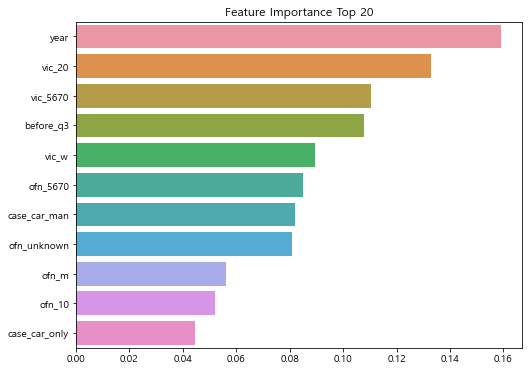

Index(['year', 'vic_20', 'vic_5670', 'before_q3', 'vic_w', 'ofn_5670',
       'case_car_man', 'ofn_unknown', 'ofn_m', 'ofn_10', 'case_car_only'],
      dtype='object')


In [639]:
ft_importance_values = a.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train_q3_t.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()
print(ft_top20.index)

### Catboost로 돌려보기

In [701]:
model = CatBoostClassifier()
cat_model = model.fit(X_train_q3_t, y_q3_train)
pred33 = cat_model.predict(X_test_q3_t)

Learning rate set to 0.072157
0:	learn: 4.3475016	total: 92.6ms	remaining: 1m 32s
1:	learn: 4.3242127	total: 165ms	remaining: 1m 22s
2:	learn: 4.3019108	total: 236ms	remaining: 1m 18s
3:	learn: 4.2799728	total: 310ms	remaining: 1m 17s
4:	learn: 4.2575367	total: 380ms	remaining: 1m 15s
5:	learn: 4.2354652	total: 452ms	remaining: 1m 14s
6:	learn: 4.2125394	total: 526ms	remaining: 1m 14s
7:	learn: 4.1909974	total: 598ms	remaining: 1m 14s
8:	learn: 4.1691048	total: 673ms	remaining: 1m 14s
9:	learn: 4.1470171	total: 749ms	remaining: 1m 14s
10:	learn: 4.1251360	total: 826ms	remaining: 1m 14s
11:	learn: 4.1040984	total: 900ms	remaining: 1m 14s
12:	learn: 4.0814685	total: 978ms	remaining: 1m 14s
13:	learn: 4.0618296	total: 1.05s	remaining: 1m 14s
14:	learn: 4.0409752	total: 1.13s	remaining: 1m 14s
15:	learn: 4.0199462	total: 1.2s	remaining: 1m 13s
16:	learn: 3.9971031	total: 1.27s	remaining: 1m 13s
17:	learn: 3.9760572	total: 1.34s	remaining: 1m 13s
18:	learn: 3.9538144	total: 1.42s	remaining:

160:	learn: 1.6613204	total: 11.6s	remaining: 1m
161:	learn: 1.6490633	total: 11.7s	remaining: 1m
162:	learn: 1.6426558	total: 11.8s	remaining: 1m
163:	learn: 1.6304461	total: 11.8s	remaining: 1m
164:	learn: 1.6204385	total: 11.9s	remaining: 1m
165:	learn: 1.6134996	total: 12s	remaining: 1m
166:	learn: 1.6020064	total: 12s	remaining: 1m
167:	learn: 1.5904717	total: 12.1s	remaining: 1m
168:	learn: 1.5784553	total: 12.2s	remaining: 60s
169:	learn: 1.5676557	total: 12.3s	remaining: 59.9s
170:	learn: 1.5654555	total: 12.3s	remaining: 59.8s
171:	learn: 1.5537078	total: 12.4s	remaining: 59.7s
172:	learn: 1.5424330	total: 12.5s	remaining: 59.7s
173:	learn: 1.5309764	total: 12.6s	remaining: 59.6s
174:	learn: 1.5245819	total: 12.6s	remaining: 59.5s
175:	learn: 1.5189662	total: 12.7s	remaining: 59.4s
176:	learn: 1.5073688	total: 12.8s	remaining: 59.4s
177:	learn: 1.4971384	total: 12.8s	remaining: 59.3s
178:	learn: 1.4858231	total: 12.9s	remaining: 59.2s
179:	learn: 1.4807957	total: 13s	remaining

322:	learn: 0.6847372	total: 24.4s	remaining: 51.2s
323:	learn: 0.6811027	total: 24.5s	remaining: 51.1s
324:	learn: 0.6767017	total: 24.6s	remaining: 51.1s
325:	learn: 0.6731648	total: 24.7s	remaining: 51s
326:	learn: 0.6693062	total: 24.7s	remaining: 50.9s
327:	learn: 0.6667926	total: 24.8s	remaining: 50.9s
328:	learn: 0.6664853	total: 24.9s	remaining: 50.8s
329:	learn: 0.6623220	total: 25s	remaining: 50.7s
330:	learn: 0.6618396	total: 25.1s	remaining: 50.7s
331:	learn: 0.6601229	total: 25.2s	remaining: 50.6s
332:	learn: 0.6578747	total: 25.2s	remaining: 50.5s
333:	learn: 0.6536847	total: 25.3s	remaining: 50.5s
334:	learn: 0.6504660	total: 25.4s	remaining: 50.4s
335:	learn: 0.6465614	total: 25.5s	remaining: 50.4s
336:	learn: 0.6425797	total: 25.6s	remaining: 50.3s
337:	learn: 0.6406929	total: 25.6s	remaining: 50.2s
338:	learn: 0.6369299	total: 25.7s	remaining: 50.2s
339:	learn: 0.6338973	total: 25.8s	remaining: 50.1s
340:	learn: 0.6302346	total: 25.9s	remaining: 50.1s
341:	learn: 0.62

481:	learn: 0.3422024	total: 37.6s	remaining: 40.4s
482:	learn: 0.3406267	total: 37.7s	remaining: 40.3s
483:	learn: 0.3391467	total: 37.7s	remaining: 40.2s
484:	learn: 0.3378491	total: 37.8s	remaining: 40.2s
485:	learn: 0.3367557	total: 37.9s	remaining: 40.1s
486:	learn: 0.3352989	total: 38s	remaining: 40s
487:	learn: 0.3340247	total: 38.1s	remaining: 39.9s
488:	learn: 0.3330088	total: 38.2s	remaining: 39.9s
489:	learn: 0.3317695	total: 38.2s	remaining: 39.8s
490:	learn: 0.3307978	total: 38.3s	remaining: 39.7s
491:	learn: 0.3294528	total: 38.4s	remaining: 39.7s
492:	learn: 0.3279549	total: 38.5s	remaining: 39.6s
493:	learn: 0.3269867	total: 38.6s	remaining: 39.5s
494:	learn: 0.3256262	total: 38.7s	remaining: 39.4s
495:	learn: 0.3252249	total: 38.7s	remaining: 39.4s
496:	learn: 0.3240393	total: 38.8s	remaining: 39.3s
497:	learn: 0.3234217	total: 38.9s	remaining: 39.2s
498:	learn: 0.3222307	total: 39s	remaining: 39.1s
499:	learn: 0.3210752	total: 39.1s	remaining: 39.1s
500:	learn: 0.3201

641:	learn: 0.2136782	total: 50.8s	remaining: 28.3s
642:	learn: 0.2133194	total: 50.9s	remaining: 28.2s
643:	learn: 0.2129167	total: 51s	remaining: 28.2s
644:	learn: 0.2122422	total: 51s	remaining: 28.1s
645:	learn: 0.2115797	total: 51.1s	remaining: 28s
646:	learn: 0.2109470	total: 51.2s	remaining: 27.9s
647:	learn: 0.2104955	total: 51.3s	remaining: 27.9s
648:	learn: 0.2098536	total: 51.4s	remaining: 27.8s
649:	learn: 0.2092150	total: 51.4s	remaining: 27.7s
650:	learn: 0.2087936	total: 51.5s	remaining: 27.6s
651:	learn: 0.2081472	total: 51.6s	remaining: 27.5s
652:	learn: 0.2076383	total: 51.7s	remaining: 27.5s
653:	learn: 0.2071665	total: 51.8s	remaining: 27.4s
654:	learn: 0.2065898	total: 51.8s	remaining: 27.3s
655:	learn: 0.2060990	total: 51.9s	remaining: 27.2s
656:	learn: 0.2054663	total: 52s	remaining: 27.2s
657:	learn: 0.2052850	total: 52.1s	remaining: 27.1s
658:	learn: 0.2046777	total: 52.2s	remaining: 27s
659:	learn: 0.2042240	total: 52.3s	remaining: 26.9s
660:	learn: 0.2036598	

803:	learn: 0.1510918	total: 1m 4s	remaining: 15.6s
804:	learn: 0.1507099	total: 1m 4s	remaining: 15.5s
805:	learn: 0.1503987	total: 1m 4s	remaining: 15.5s
806:	learn: 0.1501216	total: 1m 4s	remaining: 15.4s
807:	learn: 0.1497576	total: 1m 4s	remaining: 15.3s
808:	learn: 0.1495009	total: 1m 4s	remaining: 15.2s
809:	learn: 0.1491524	total: 1m 4s	remaining: 15.1s
810:	learn: 0.1488358	total: 1m 4s	remaining: 15.1s
811:	learn: 0.1486581	total: 1m 4s	remaining: 15s
812:	learn: 0.1483021	total: 1m 4s	remaining: 14.9s
813:	learn: 0.1480081	total: 1m 4s	remaining: 14.8s
814:	learn: 0.1478192	total: 1m 5s	remaining: 14.8s
815:	learn: 0.1474394	total: 1m 5s	remaining: 14.7s
816:	learn: 0.1470892	total: 1m 5s	remaining: 14.6s
817:	learn: 0.1467920	total: 1m 5s	remaining: 14.5s
818:	learn: 0.1466006	total: 1m 5s	remaining: 14.4s
819:	learn: 0.1462700	total: 1m 5s	remaining: 14.4s
820:	learn: 0.1459311	total: 1m 5s	remaining: 14.3s
821:	learn: 0.1457511	total: 1m 5s	remaining: 14.2s
822:	learn: 0.

962:	learn: 0.1157933	total: 1m 17s	remaining: 2.96s
963:	learn: 0.1156878	total: 1m 17s	remaining: 2.88s
964:	learn: 0.1154927	total: 1m 17s	remaining: 2.8s
965:	learn: 0.1153249	total: 1m 17s	remaining: 2.72s
966:	learn: 0.1151619	total: 1m 17s	remaining: 2.64s
967:	learn: 0.1149776	total: 1m 17s	remaining: 2.56s
968:	learn: 0.1148477	total: 1m 17s	remaining: 2.48s
969:	learn: 0.1147490	total: 1m 17s	remaining: 2.4s
970:	learn: 0.1146118	total: 1m 17s	remaining: 2.32s
971:	learn: 0.1143927	total: 1m 17s	remaining: 2.24s
972:	learn: 0.1142491	total: 1m 17s	remaining: 2.16s
973:	learn: 0.1141781	total: 1m 18s	remaining: 2.08s
974:	learn: 0.1139789	total: 1m 18s	remaining: 2s
975:	learn: 0.1138108	total: 1m 18s	remaining: 1.92s
976:	learn: 0.1136568	total: 1m 18s	remaining: 1.84s
977:	learn: 0.1134501	total: 1m 18s	remaining: 1.76s
978:	learn: 0.1133452	total: 1m 18s	remaining: 1.68s
979:	learn: 0.1132148	total: 1m 18s	remaining: 1.6s
980:	learn: 0.1130205	total: 1m 18s	remaining: 1.52s

In [702]:
mean_absolute_error(y_q3_test, pred33)

2.5085369389231613